<a href="https://colab.research.google.com/github/pyatibratova/karpov.courses/blob/main/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 2**   
К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%

**Дата	Число заказов**    
    2020-01-05	650  
    2020-01-12	837  
    2020-01-19	1020  
    2020-01-26	1176  
    2020-02-02	1489  
    2020-02-09	1823  
    2020-02-16	1991  
    2020-02-23	2166  
    2020-03-01	2334  
    2020-03-08	2607  
    2020-03-15	2734  
    2020-03-22	3492  
    2020-03-29	3608  
    2020-04-05	3857  

In [20]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [21]:
df = pd.read_csv("test2_completed.csv")
df.head()

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Дата           14 non-null     object
 1   Число заказов  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [23]:
df['Дата'] = pd.to_datetime(df['Дата'])
df['ts'] = df[['Дата']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)


**Исключим недели, проведения акции**

In [24]:
df = df.loc[~df['Дата'].isin([1580601600, 1581206400])]

**Нам нужно спрогнозировать продажи на ближайшие 3 месяца**

In [25]:
new_date = ['2020-04-12','2020-04-19','2020-04-26','2020-05-03',
     '2020-05-10','2020-05-17','2020-05-24','2020-05-31',
     '2020-06-07','2020-06-14','2020-06-21','2020-06-28',
     '2020-07-05']
#date_ = new_date

In [26]:
new_date = [int(time.mktime(datetime.datetime.strptime(i , '%Y-%m-%d').timetuple())) for i in new_date]
new_date = np.array(new_date).reshape(13,1)

**Для решения задачи будем использовать модель линейной регрессии**

In [28]:
x = df.ts.values.reshape(-1,1)
y = df["Число заказов"].values.reshape(-1,1)
model = LinearRegression().fit(x, y)

**Проверяем модель**

In [29]:
r_sq = model.score(x, y)
r_sq

0.9825538022955228

In [30]:
print (model.intercept_, model.coef_)

[-645381.00973312] [[0.00040927]]


In [31]:
y_predicted = model.predict(x)
y_predicted_new = model.predict(new_date)

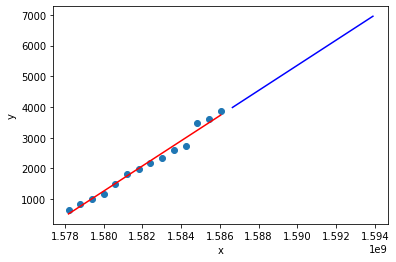

In [32]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_predicted, color='r')
plt.plot(new_date, y_predicted_new, color='b')
plt.show()

**Вывод:**     
 Согласно линейной регрессии, видна тенденция к росту количества заказов.        
Но нам даны данные за слишком короткий промежуток времени. Плюс мы убрали недели с акциями. Поэтому мы не можем точно прогнозировать рост заказов.
